Fluid Dynamics
==============

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores fluid dynamics for image generation.

In [2]:
using PyPlot
using NtToolBox
using Interpolations

Velocity Flow Field
-------------------
A velocity flow is simply a 2-D vector field $V = (V_i)_{i=1}^N \in \RR^{n \times n \times 2}$
where $V_i \in \RR^2$ is one of the $N=n \times n$ vectors at a position indexed by $i$.


It can be generated as a realization of Gaussian process.
The blurring creates correlations in the flow.

In [2]:
n = 128
V = perform_blurring(randn(n,n,2),[40], "per");

Subsampling display operator.

In [3]:
myplot = V-> plot_vf(V[1:6:n,1:6:n, :])

(::#1) (generic function with 1 method)

We can display the vector field using arrow.

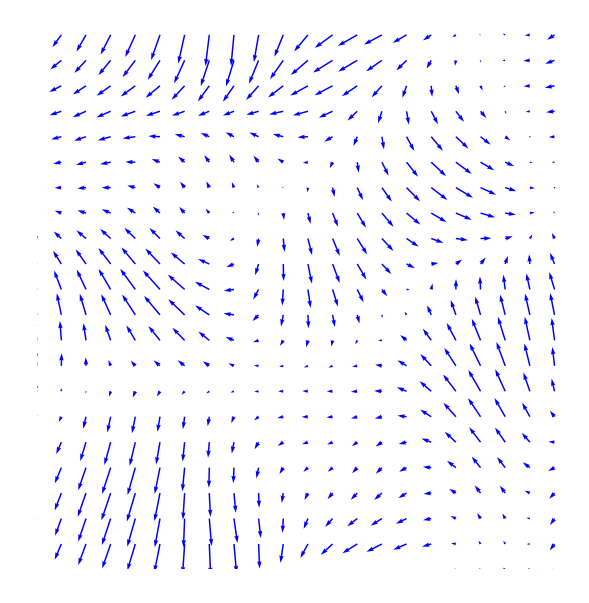

In [4]:
figure(figsize = (7,7))
myplot(V)

We can renormalize the flow, which enhances the singularities. It defines
$\tilde V$ as $\tilde V_i = V_i/\norm{V_i}$.

In [5]:
Normalize = V -> V ./ repeat( max(1e-9,sqrt.(sum(V.^2, 3))) , outer=(1,1,2));

Display.

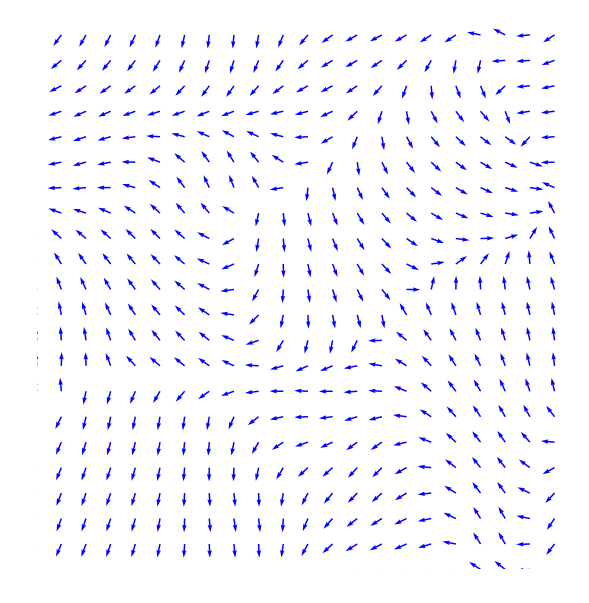

In [6]:
figure(figsize = (7,7))
myplot(Normalize(V))

Incompressible Flows
--------------------
An incompressible flow has a vanishing divergence. The set of vector
incompressible flow defines a sub-space of $\RR^{n \times n \times 2}$
$$ \Ii = \enscond{V}{ \text{div}(V)=0 }
  \qwhereq \text{div}(V) = \pd{V}{x_1} + \pd{V}{x_2} \in \RR^{n \times n}. $$
Here $\pd{}{x_s}$ for $s=1,2$ are finite differences approximation of
the horizontal and vertical derivative operators (we suppose here periodic boundary conditions).



The orthogonal projection $U = \text{Proj}_{\Ii}(V)$ on  $\Ii$ is
computed by solving a Poisson equation
$$ U = V-\nabla A \qwhereq \Delta A = \text{div}(V). $$


This is especially simple for periodic boundary conditions since $A$ can
be computed over the Fourier domain as
$$ \forall \om \neq 0, \quad \hat A(\om) = \frac{\hat Y(\om)}{\mu(\om)}
  \qwhereq Y = \text{div}(V) \qandq
  \mu(\om_1,\om_2) = -4 \sin(\om_1 \pi / n)^2 -4 \sin(\om_2 \pi / n)^2  $$
and $\hat A(0)=0$.



Compute the kernel $\mu(\om)$.

In [7]:
Y, X = meshgrid(0:n-1,0:n-1)
mu = sin.(X*pi/n).^2
mu = -4*(mu + mu')
mu[1,1] = 1;

Computation of $A$.

In [8]:
A = V -> real.(ifft(fft(Div(V[:,:,1], V[:,:,2], "per"))./mu))

(::#5) (generic function with 1 method)

Projection on incompressible flows.

In [9]:
ProjI = V -> V - Grad(A(V), "per")

(::#7) (generic function with 1 method)

Display $U=\text{Proj}_{\Ii}(V)$.

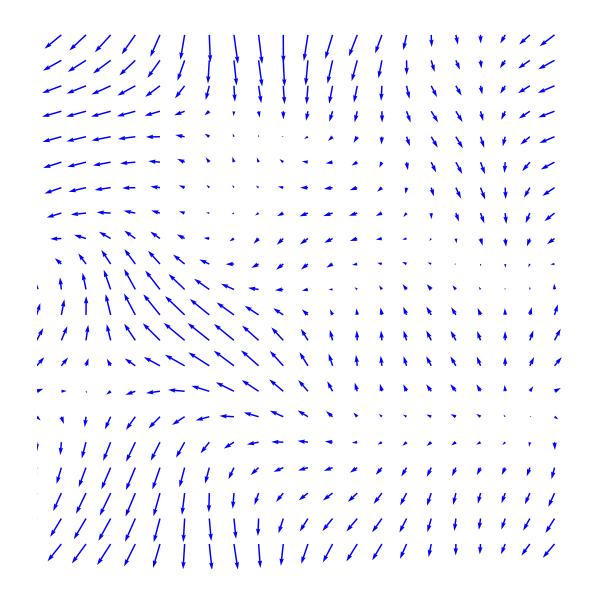

In [10]:
U = ProjI(V)

figure(figsize=(7,7))
myplot(U)

Display $W=U-V$ the irrotational component of $V$.

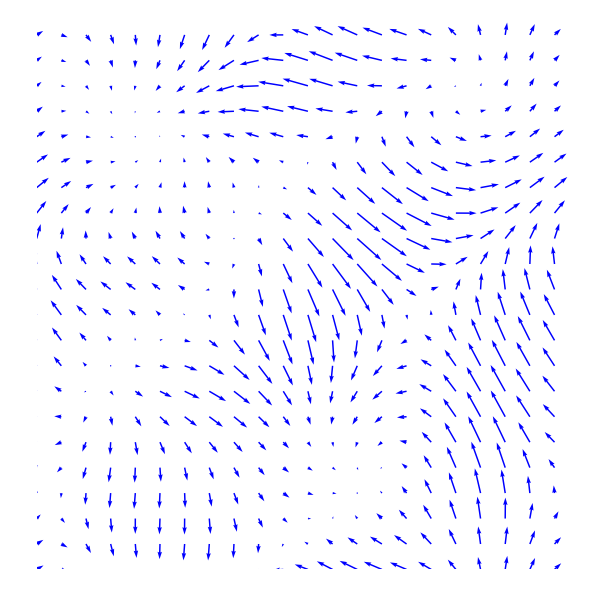

In [11]:
figure(figsize=(7,7))
myplot(V-U)

Note that the decomposition $V=U+W$ is called the Hoge decomposition of
the vector field.


Image Advection Along the Flow
------------------------------
A flow defines a warping operator that transport the content of an image
along the streaming of the flow.


We load an image $f$.

In [12]:
f = load_image("NtToolBox/src/data/lena.png", 2*n)
f = f[n-Base.div(n,2):n+Base.div(n,2)-1, n-Base.div(n,2):n+Base.div(n,2)-1];

Given some vector field $U$, the warping operator $f_1 = \Ww_U(f)$
along the flow is defined
$$ f_1(x) = f(x+U(x)) $$
i.e. it advects the values of $f$ by the vector field $U$ to obtain the values of $f_1$.


We define $U$ as a scaled normalized incompressible flow.

In [13]:
U = Normalize(ProjI(V));

Helper function: enforce periodicity.

In [14]:
periodic = P -> cat(3, mod(P[:,:,1]-1,n)+1, mod(P[:,:,2]-1,n)+1 );

Helper function: extend an image by 1 pixel to avoid boundary problems.

In [15]:
extend1 = f -> [f f[:,1]]
extend = f -> extend1(extend1(f)')';

Helper function: bilinear interpolation on a grid.

In [16]:
f1 = extend(f)
itp = interpolate((1:size(f1,1), 1:size(f1,2)), f1, Gridded(Linear()))
size(itp)

(129,129)

In [17]:
function myinterp(P1,f1,Pi)
    itp = interpolate((1:size(f1,1), 1:size(f1,2)), f1, Gridded(Linear()))
    itpd = zeros(size(Pi)[1:2])
    for i in 1:size(Pi,1)
        for j in 1:size(Pi,2)
        itpd[i,j] = itp[Pi[i,j,1], Pi[i,j,2]]
        end
    end
    return itpd
end;

First we compute the initial and wraped grids.

In [18]:
(Y,X) = meshgrid(1:n,1:n)
P = cat(3, X,Y)
(Y1,X1) = meshgrid(1:n+1,1:n+1)
P1 = cat(3, X1,Y1);

Defines the warping operator $\Ww_U$.

In [19]:
W =  (f, U) -> myinterp(P1, extend(f), periodic(P - U));

Display a warped image $\Ww_{\rho U}(f)$ for some scaling $\rho$.

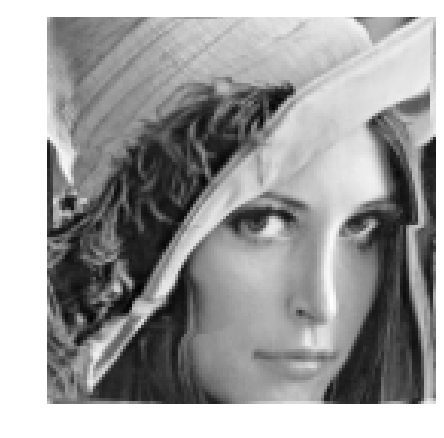

In [20]:
rho = 2
figure(figsize = (5,5))
imageplot(W(f, rho*U))

__Exercise 1__

Display $\Ww_{\rho U}(f)$ for various values of $\rho$.

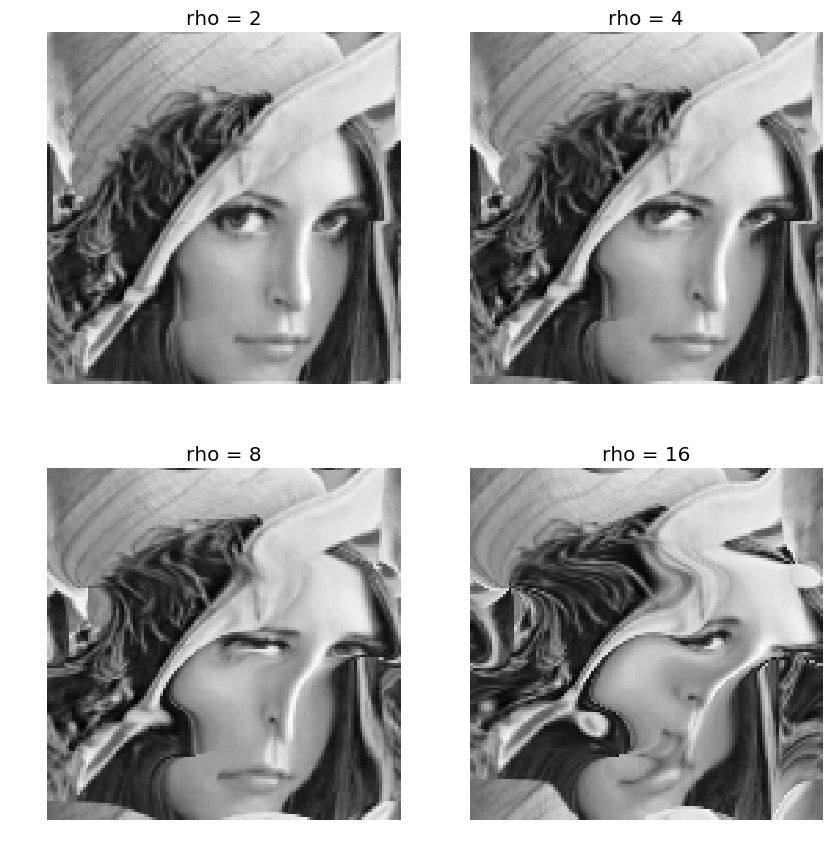

In [21]:
include("NtSolutions/graphics_5_fluids/exo1.jl")

In [22]:
## Insert your code here.

__Exercise 2__

Define an iterative scheme via:
$$ f^{(\ell+1)} = \Ww_{\rho U}(f^{(\ell)}).  $$
Display the result $f^{(\ell)}$, which corresponds approximately to solving
an advection equation at time $t=\ell \rho$.

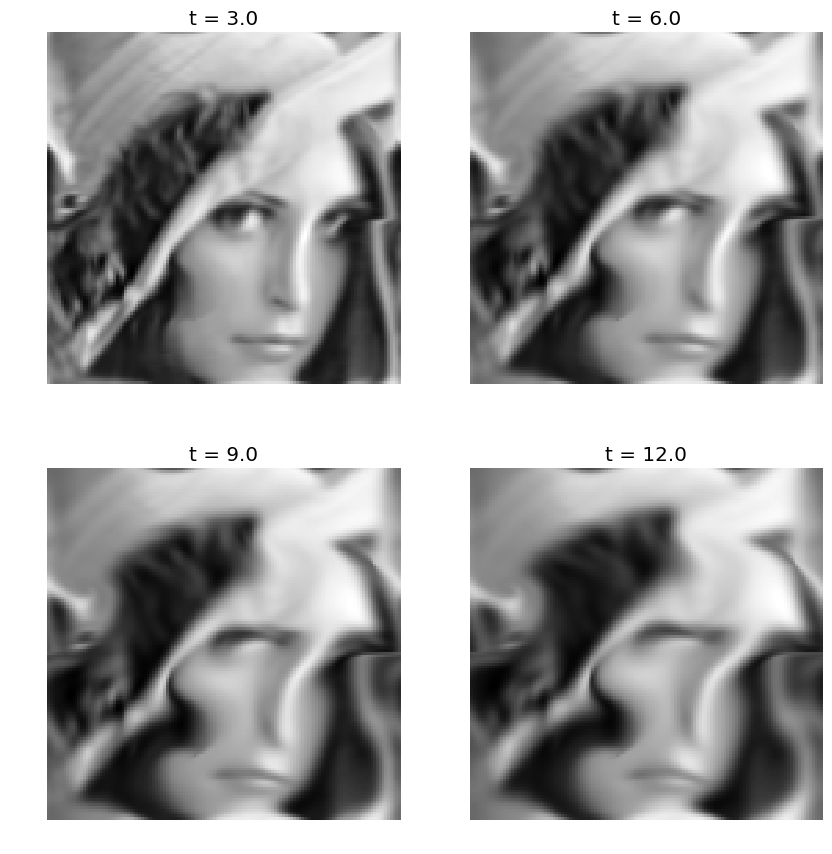

In [23]:
include("NtSolutions/graphics_5_fluids/exo2.jl")

In [24]:
## Insert your code here.

Fluid Dynamics
--------------
Fluid dynamics solves the incompressible Navier-Stokes equations to
evolve in time the vector field.


We discribe here a simple algorithm introduced in:


J. Stam, _Stable Fluids,_
SIGGRAPH'99, 1999, p. 121-128.


It proposes a semi-implicit scheme for the resolution of the Navier
Stockes equations for the movement of incompressible fluids
$$
      \pd{V}{t} =
      \text{Proj}_{\Ii}\pa{
          -(V \cdot \nabla) V + \nu \Delta V + W
      }.
$$
Here $\nu \geq 0$ is the viscosity of the fluid,
$W$ is a source term, $\Delta$ is the Laplacian, and
$-(V \cdot \nabla) V$ is the
non-linear self-advection, where we have used the short-hand
notation $V \cdot \nabla$ for the derivative operator along a flow $V$:
$$ (V \cdot \nabla)U = ( V_1 \pd{U_1}{x_1} + V_2 \pd{U_1}{x_2},
      V_1 \pd{U_2}{x_1} + V_2 \pd{U_2}{x_2} ).$$


In order to visualize the flow, we also advect and diffuse along the flow
a density $g$ of particules, which is a scalar field. Once $V$ has
been computed, it follows a linear PDE
$$
      \pd{g}{t} =
          -(V \cdot \nabla) g + \mu \Delta g + h
$$
with some initial condition at time $t=0$, where $h$ is a source for the density.


In practice, we solve this PDE in parallel to the PDE for $V$.


In the following, we use $W=0$ and $h=0$ (no sources).


Set the viscosity $\nu$ for the velocity field.

In [25]:
nu = 1/10

0.1

We use a larger viscosity $\mu$ for the evolution of the density of
particules.

In [26]:
mu = 2*nu

0.2

Extend the warping operator $\Ww_U$ to work with vector fields as input.
This will apply $\Ww_U$ on each channel of the vector field (X and Y coordinates).

In [27]:
Wt = (V,U) -> cat(3, W(V[:,:,1],U), W(V[:,:,2],U) );

We discretize the PDE's using some time step $\tau$.

In [28]:
tau = .5;

The algorithm computes $V^{(\ell)}$ at iteration $\ell$
which is an approximation of the PDE solution at time $\ell \tau$.
It is computed itertatively as
$$
      \tilde V^{(\ell)} = \Ww_{\tau V^{(\ell)}}( V^{(\ell)} )
  \qandq
      V^{(\ell+1)} = \text{Proj}_{\Ii}\pa{ \tilde V^{(\ell)} + \tau\nu\Delta \tilde V^{(\ell)} + \tau W  }
$$


It computes in parallel the evolution of the density as
$$
      \tilde g^{(\ell)} = \Ww_{\tau V^{(\ell)}}( g^{(\ell)} )
  \qandq
      g^{(\ell+1)} = \tilde g^{(\ell)} + \tau\nu\Delta \tilde g^{(\ell)} + \tau h
$$



Set the initial field $V=V^{(0)}$ at time $t=0$.

In [29]:
V = Normalize(ProjI(V));

Set the initial density $g=g^{(0)}$ at time $t=0$.

In [30]:
g = copy(f);

The first step is to advect the vector field $V$ and $g$ along the flow $V$ itself.
This corresponds to an implict discretization of the term
$-(V \cdot \nabla) V$.

In [31]:
g = W(g, tau*U)
V = Wt(V, tau*U);

We implement the Laplacian using finite difference.

In [32]:
s1 = [2:n; 1]; s2 = [n; 1:n-1];

function Delta(g)
    delta = 1/4.*(g[s1,:,:] + g[s2,:,:] + g[:,s1,:] + g[:,s2,:]) - g
    if size(delta,3)==1
        delta = delta[:,:,1] 
    end
    return delta
end;

The second step is to diffuse the vector field and the density.

In [33]:
V = V + tau*nu*Delta(V)
g = g + tau*mu*Delta(g);

The last step is to ensure incompressibility of $V$ by projecting on $\Ii$.

In [34]:
V = ProjI(V);

__Exercise 3__

Compute the fluid dynamic by iterating these steps.

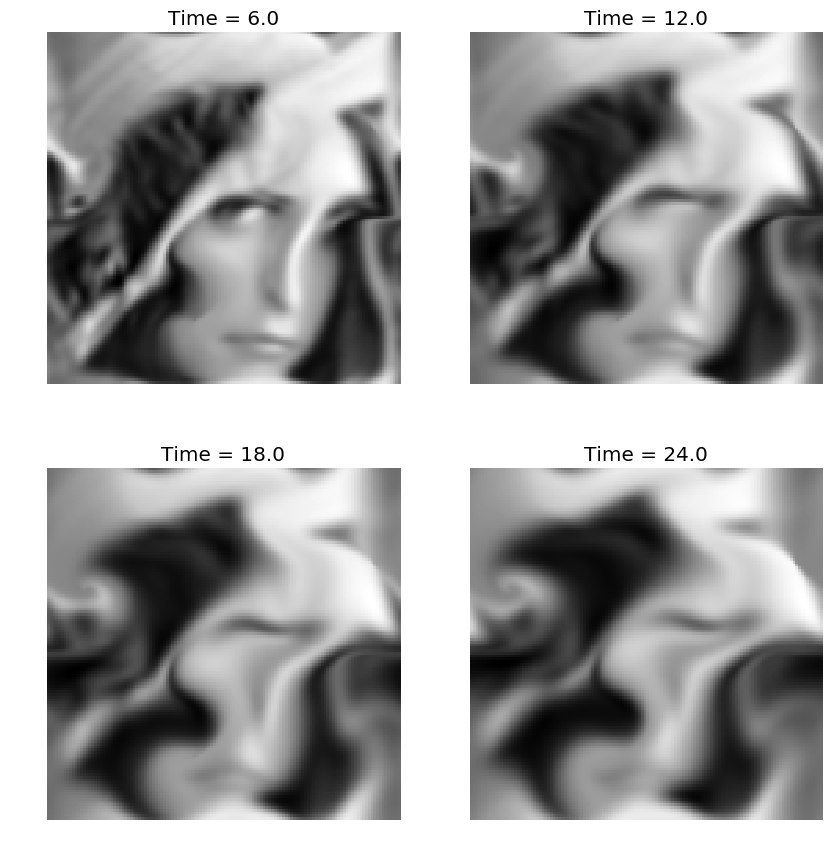

In [35]:
include("NtSolutions/graphics_5_fluids/exo3.jl")

In [36]:
## Insert your code here.